<a href="https://colab.research.google.com/github/KevinXander/ProcesamientoImagenes/blob/master/Clase4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')
import numpy as np
import matplotlib.pyplot as plt
import cv2

%matplotlib inline

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


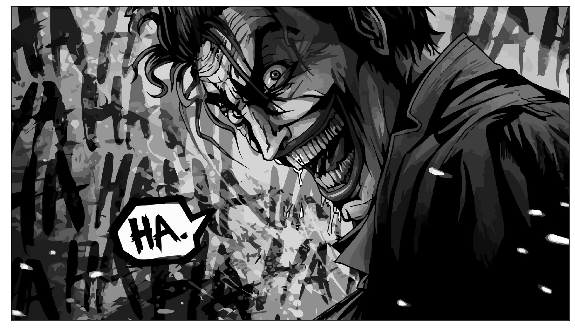

In [5]:
from google.colab.patches import cv2_imshow
img = cv2.imread('/content/drive/My Drive/Procesamiento Imagenes/joker.jpg')
img_GRAY=cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

plt.figure(figsize=(10,10))
plt.imshow(img_GRAY, cmap='gray') #Ojo, debe mapearse la imagen a gris para que salga correctamente en escala de grises
plt.xticks([])
plt.yticks([])
plt.show()

In [0]:
def display_four(a, b,c, d, title1 = "Original", title2= "BGR", title3="RGB", title4="GRIS"):
  plt.figure(figsize=(14,14))
  plt.subplot(221), plt.imshow(a), plt.title(title1)
  plt.xticks([]), plt.yticks([])
  plt.subplot(222), plt.imshow(b, cmap="gray"), plt.title(title2)
  plt.xticks([]), plt.yticks([])
  plt.subplot(223), plt.imshow(c, cmap="gray"), plt.title(title3)
  plt.xticks([]), plt.yticks([])
  plt.subplot(224), plt.imshow(d, cmap="gray"), plt.title(title4)
  plt.xticks([]), plt.yticks([])
  plt.show()

# **Separar matrices de color de una imagen BGR**

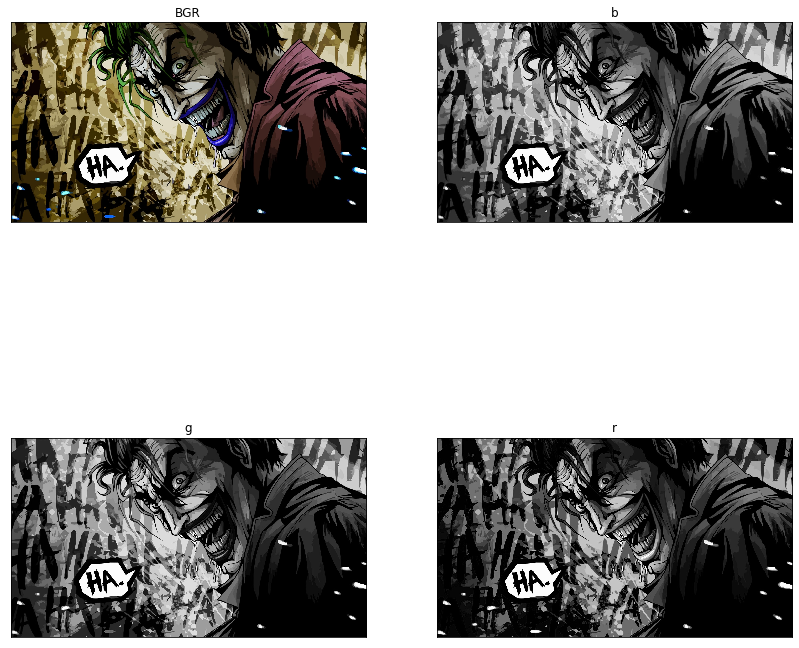

In [9]:
img_BGR = cv2.imread('/content/drive/My Drive/Procesamiento Imagenes/joker.jpg', cv2.IMREAD_COLOR)

b= img_BGR [:,:,0]
g= img_BGR [:,:,1]
r= img_BGR [:,:,2]

display_four(img_BGR, b, g, r, "BGR", "b", "g", "r")

# Otra forma de separar matrices (esta vez con una imagen en RGB)**texto en negrita**

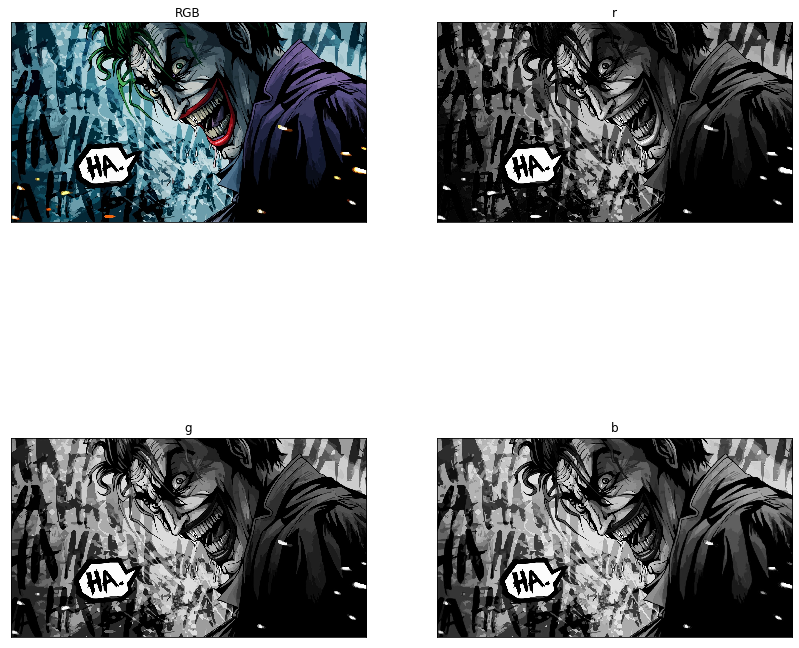

In [13]:
img_RGB = cv2.cvtColor(img_BGR, cv2.COLOR_BGR2RGB)
r,g,b = cv2.split(img_RGB)

display_four(img_RGB, r, g, b, "RGB", "r", "g", "b")

# **Como cargar cada canal por separado (RGB)**

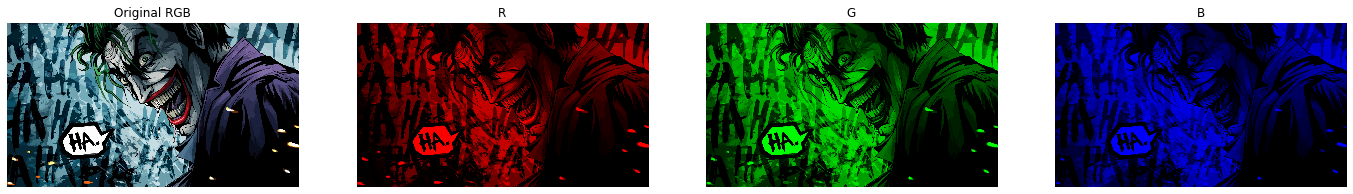

In [16]:
count=2
plt.figure(figsize=(24,8))
plt.subplot(1,4,1), plt.imshow(img_RGB/255.0), plt.title("Original RGB")
plt.axis("off")
for i, lab in enumerate(["R", "G", "B"]):
  crgb = np.zeros(img_RGB.shape)
  crgb[:,:,i] = img_RGB[:,:,i]
  plt.subplot(1,4,count), plt.imshow(crgb/255.0), plt.title(lab)
  plt.axis("off")
  count +=1

plt.show()

# **Usando el espacio de color LAB**

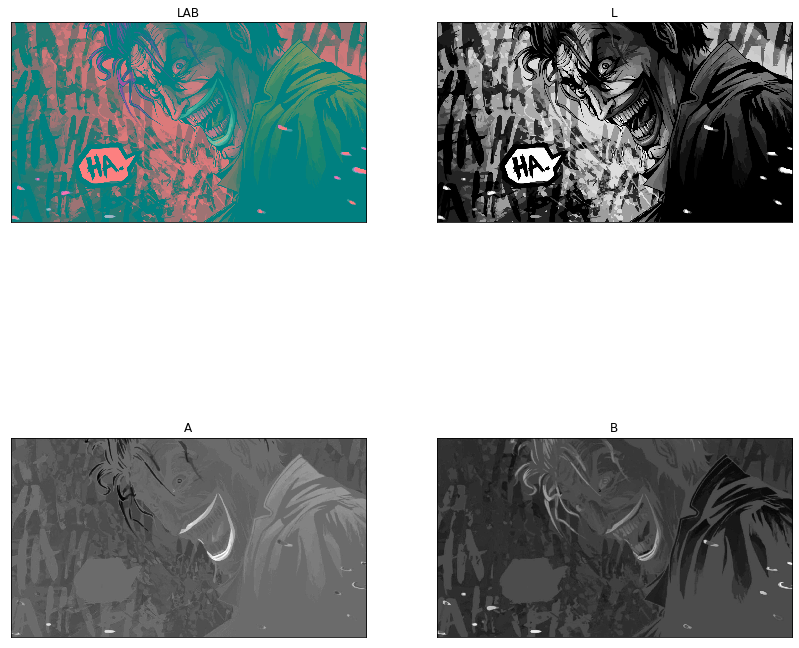

In [17]:
img_LAB = cv2.cvtColor(img_BGR, cv2.COLOR_BGR2LAB)
L,A,B = cv2.split(img_LAB)
display_four(img_LAB, L, A, B, "LAB", "L", "A", "B")

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(<matplotlib.image.AxesImage at 0x7f042fe817f0>,
 Text(0.5, 1.0, 'B: color spectrums blue to yellow'),
 (-0.5, 2559.5, 1439.5, -0.5))

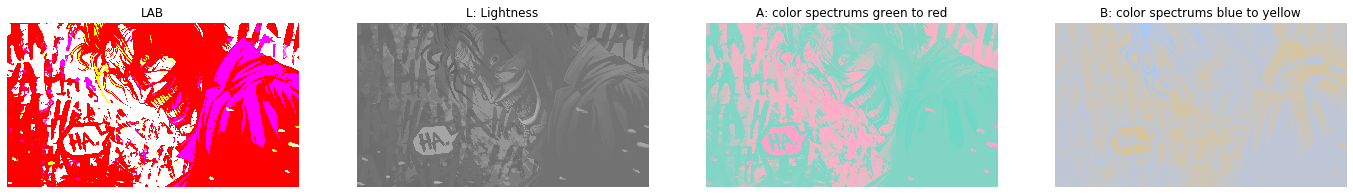

In [20]:
from skimage.color import rgb2lab, lab2rgb
def one_chanel_LAB_convert_to_RGB(image, idim):
  z=np.zeros(image.shape) #Image es una imagen lab cualquiera de tamaño (nada,nada,3)
  if idim !=0:
    z[:,:,0]=80
  z[:,:,idim] = image[:,:,idim]
  z=lab2rgb(z)
  return(z)

#img_LAB = cv2.cvtColor(img_BGR, cv2.COLOR_BGR2LAB)
img_LAB=rgb2lab(img_LAB)

count=1
plt.figure(figsize=(24,8))

plt.subplot(1,4,1)
plt.imshow(img_LAB), plt.title("LAB"), plt.axis("off")

plt.subplot(1,4,2)
lab_rgb_gray = one_chanel_LAB_convert_to_RGB(img_LAB,0)
plt.imshow(lab_rgb_gray), plt.title("L: Lightness"), plt.axis("off")

plt.subplot(1,4,3)
lab_rgb_gray = one_chanel_LAB_convert_to_RGB(img_LAB,1)
plt.imshow(lab_rgb_gray), plt.title("A: color spectrums green to red"), plt.axis("off")

plt.subplot(1,4,4)
lab_rgb_gray = one_chanel_LAB_convert_to_RGB(img_LAB,2)
plt.imshow(lab_rgb_gray), plt.title("B: color spectrums blue to yellow"), plt.axis("off")


# **Usando el espacio de color YCrCb**

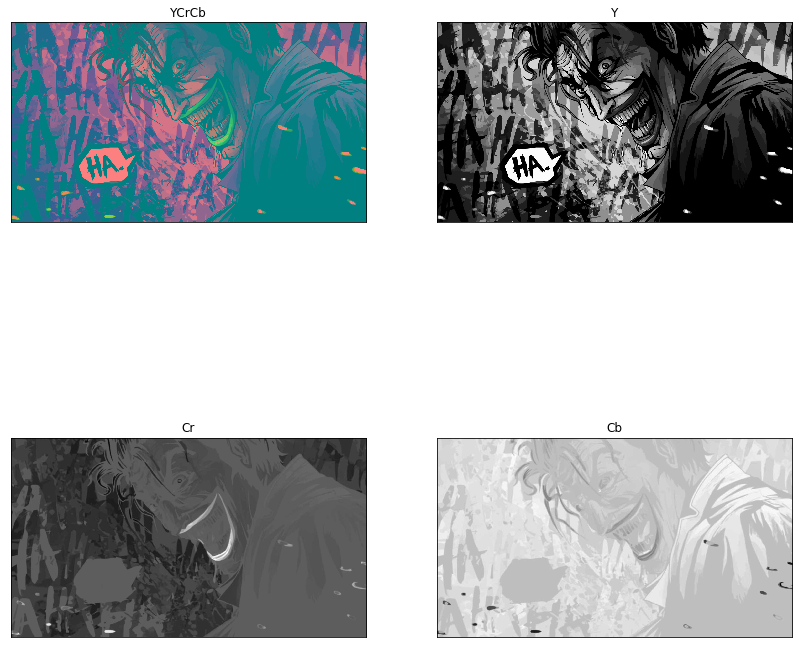

In [21]:
img_YCrCb = cv2.cvtColor(img_BGR, cv2.COLOR_BGR2YCrCb)
Y, Cr, Cb = cv2.split(img_YCrCb)
display_four(img_YCrCb, Y, Cr, Cb, "YCrCb", "Y", "Cr", "Cb")

# **Usando el espacio de color HSV **

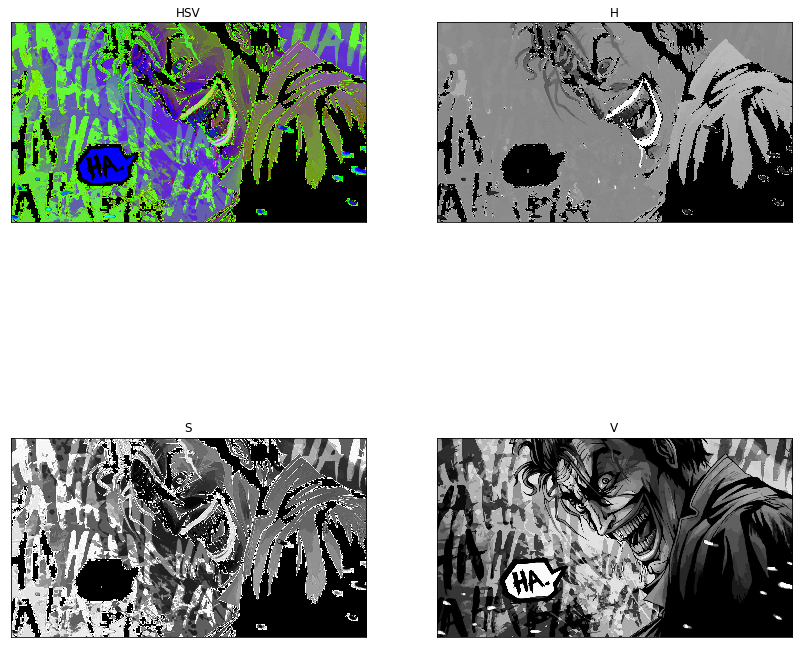

In [22]:
img_HSV = cv2.cvtColor(img_BGR, cv2.COLOR_BGR2HSV)
H,S,V = cv2.split(img_HSV)
display_four(img_HSV, H, S, V, "HSV", "H", "S", "V")

# **Ejercico Imagen Roja**

LAB

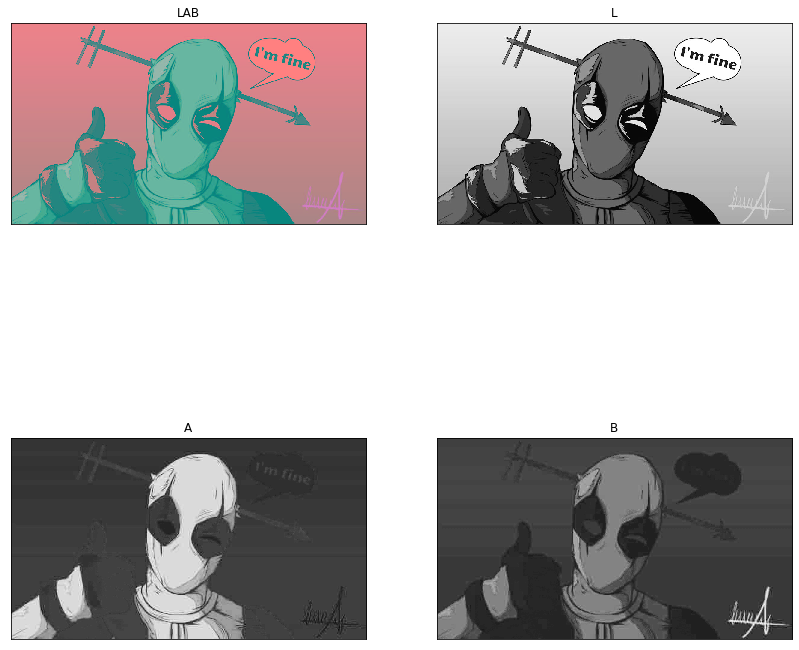

In [23]:
img_roja = cv2.imread('/content/drive/My Drive/Procesamiento Imagenes/rojo.jpg', cv2.IMREAD_COLOR)

img_LAB_roja = cv2.cvtColor(img_roja, cv2.COLOR_BGR2LAB)
L,A,B = cv2.split(img_LAB_roja)
display_four(img_LAB_roja, L, A, B, "LAB", "L", "A", "B")


YCrCb

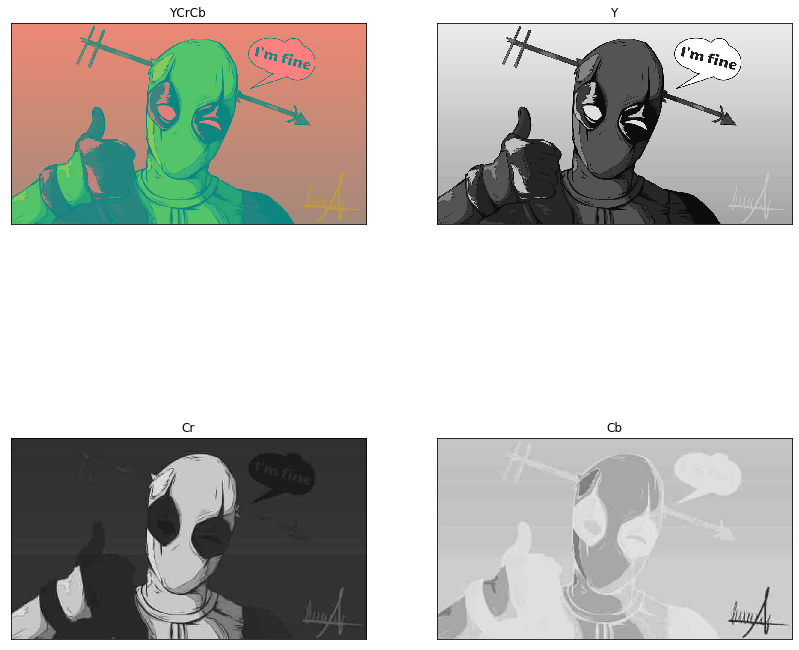

In [24]:
img_YCrCb_roja = cv2.cvtColor(img_roja, cv2.COLOR_BGR2YCrCb)
Y, Cr, Cb = cv2.split(img_YCrCb_roja)
display_four(img_YCrCb_roja, Y, Cr, Cb, "YCrCb", "Y", "Cr", "Cb")

HSV

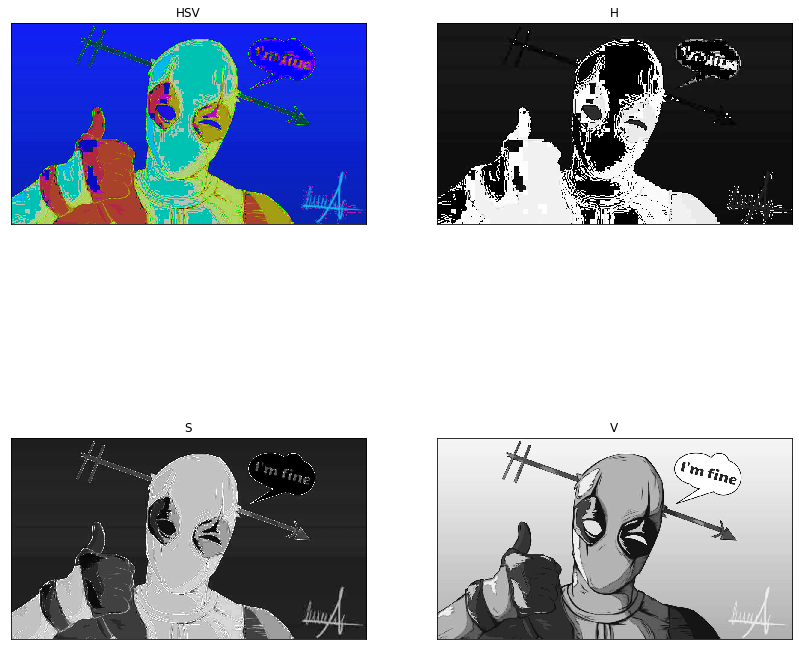

In [25]:
img_HSV_roja = cv2.cvtColor(img_roja, cv2.COLOR_BGR2HSV)
H,S,V = cv2.split(img_HSV_roja)
display_four(img_HSV_roja, H, S, V, "HSV", "H", "S", "V")

# **Ejercicio Imagen azul**

Lab

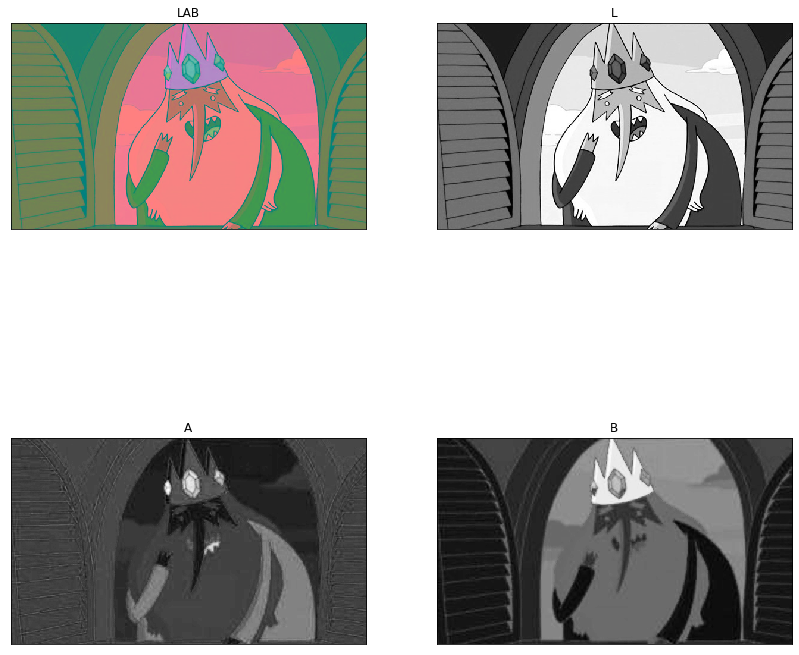

In [27]:
img_azul = cv2.imread('/content/drive/My Drive/Procesamiento Imagenes/azul.JPG', cv2.IMREAD_COLOR)

img_LAB_azul = cv2.cvtColor(img_azul, cv2.COLOR_BGR2LAB)
L,A,B = cv2.split(img_LAB_azul)
display_four(img_LAB_azul, L, A, B, "LAB", "L", "A", "B")

YCrCb

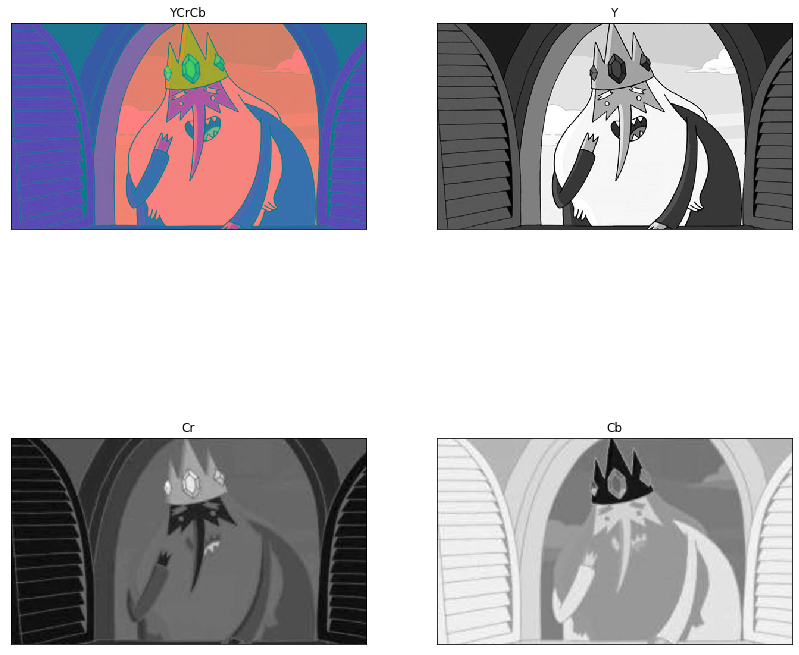

In [28]:
img_YCrCb_azul = cv2.cvtColor(img_azul, cv2.COLOR_BGR2YCrCb)
Y, Cr, Cb = cv2.split(img_YCrCb_azul)
display_four(img_YCrCb_azul, Y, Cr, Cb, "YCrCb", "Y", "Cr", "Cb")

HSV

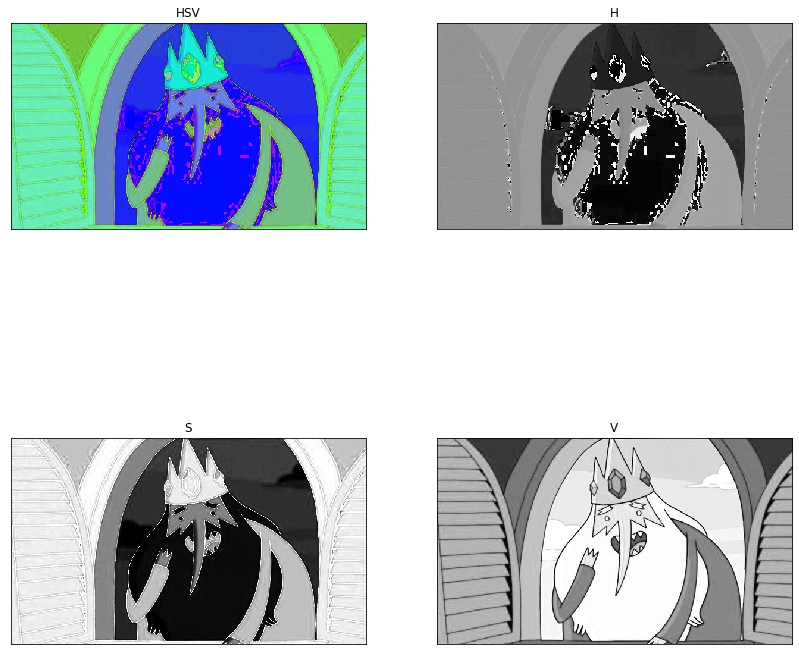

In [29]:
img_HSV_azul = cv2.cvtColor(img_azul, cv2.COLOR_BGR2HSV)
H,S,V = cv2.split(img_HSV_azul)
display_four(img_HSV_azul, H, S, V, "HSV", "H", "S", "V")